In [1]:
from helper import *
import numpy as np
import pandas as pd

In [2]:
xx = np.arange(-6, 6, 0.001)
a = norm.pdf(xx)
b = norm.pdf(xx, loc=2)

### Binomial distribution

In [3]:
bcr = 0.1
lift = 0.02
size = 4000
split = 0.5

df, summary = generate_data_equal_size(size, bcr, lift)

       clicked   count     ctr
group                         
A        197.0  2000.0  0.0985
B        236.0  2000.0  0.1180


$$X_A \sim B(n_A, p_A)$$ <br/> 
$$X_B \sim B(n_B, p_B)$$ <br/>
<div align="center">where $n_A, p_A, n_B, p_B$ are the observed sample size and CTR of group A and B</div><br/>
<div align="center">$X_A, X_B$ are the number of clicks</div>

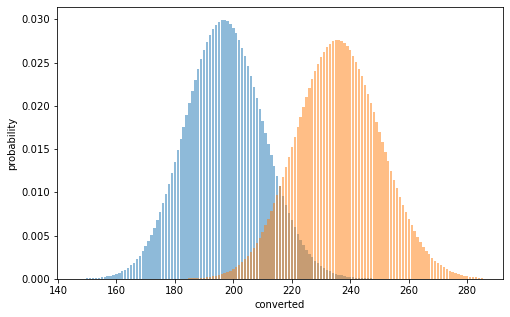

In [4]:
p_A = summary.loc['A', 'ctr']
p_B = summary.loc['B', 'ctr']
n_A = summary.loc['A', 'count']
n_B = summary.loc['B', 'count']

plot_double_binomial(n_A, p_A, n_B, p_B)

### Bernoulli distribution

$$E(X) = p $$<br/>
$$Var(X) = p(1-p)$$

$$X_i \sim Bernoulli(p, p*(1-p))$$ <br/>

$$\bar{X} \sim N{(p, \frac{p*(1-p)}{n})} $$

/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

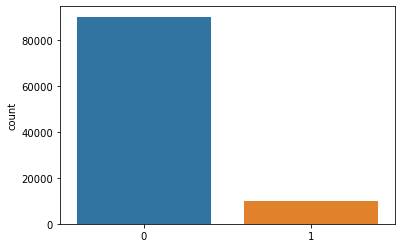

In [5]:
outcomes = []
for i in range(100000):
    p = 0.1
    outcome = np.random.binomial(1, p)
    outcomes.append(outcome)

sns.countplot(outcomes)

In [6]:
sample_means = []

# Simulating 10000 samples
for i in range(1000):
    # For each sample, we simulate 100 users
    sample = random.choices(outcomes, k=2000)
    mean = np.mean(sample)
    sample_means.append(mean)


(array([ 0.21978022,  0.65934066,  7.25274725, 15.6043956 , 44.17582418,
        62.85714286, 46.15384615, 29.01098901, 11.42857143,  2.41758242]),
 array([0.074  , 0.07855, 0.0831 , 0.08765, 0.0922 , 0.09675, 0.1013 ,
        0.10585, 0.1104 , 0.11495, 0.1195 ]),
 <BarContainer object of 10 artists>)

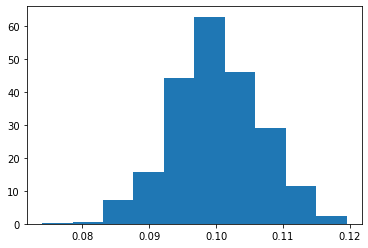

In [7]:
fig, ax = plt.subplots()
ax.hist(sample_means, density=True)

# xx = np.linspace(0.07, 0.13)
# sample_norm = norm.pdf(xx, p, np.sqrt(p*(1-p)/2000))

# ax2 = ax.twinx()
# sns.lineplot(xx, sample_norm, color='red', ax=ax2)

/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

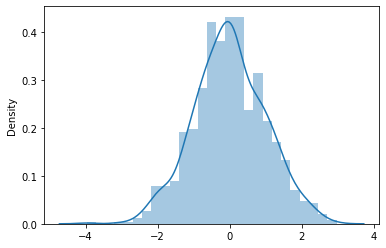

In [8]:
sample_means = (sample_means - np.mean(sample_means))/np.std(sample_means)
sns.distplot(sample_means)

In [9]:
from scipy.stats import shapiro
stat, p = shapiro(sample_means)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=0.9974807500839233, p=0.12576419115066528
Sample looks Normal (do not reject H0)


$$Z_{\alpha/2}$$

### Normalize data distribution

/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'probability')

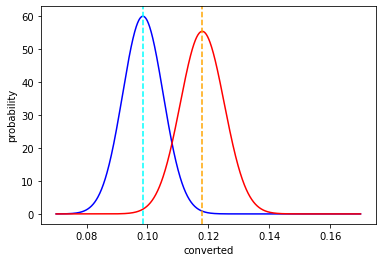

In [10]:
upper = 0.17
lower = 0.07
fig, ax = plt.subplots()
xx = np.linspace(lower, upper, 1000)
    
data_a_norm = norm.pdf(xx, p_A, np.sqrt(p_A*(1-p_A) / n_A))
data_b_norm = norm.pdf(xx, p_B, np.sqrt(p_B*(1-p_B) / n_B))

sns.lineplot(xx, data_a_norm, color='blue', ax=ax)
sns.lineplot(xx, data_b_norm, color='red', ax=ax)
ax.axvline(p_A, color='cyan', linestyle='--')
ax.axvline(p_B, color='orange', linestyle='--')

plt.xlabel('converted')
plt.ylabel('probability')

$$H_0: d = \mu_b - \mu_a = 0$$<br/>
$$H_1: d = \mu_b - \mu_a <> 0$$

### Mean and Variance of sum

$$E(d)=E(B)-E(A)$$<br/>
$$Var(d) = Var(A) + Var(B)$$

$$E(d)=E(B)-E(A)$$<br/>
$$Var(d) = \frac{p_A*(1-p_A)}{N_A} + \frac{p_B * (1-p_B)}{N_B}$$<br/>
$$= \frac{\sigma_A^2}{N_A} + \frac{\sigma_B^2}{N_B}$$<br/>
$$=>SE(d) = \sqrt{(\frac{\sigma_A^2}{N_A} + \frac{\sigma_B^2}{N_B})}$$

Here, we want the z-score of the test statistic under H1 to be at least 80%, and the z-score of the test statistic under H0 to be at least 97.5%
Recall that the z-score under H0 = P(reject H0|H0 is true) and is denoted by the blue area above.
The z-score under H1 = P(accept H0|H0 is false) is denoted by the green area above

So, under H0, we will reject H0 5% of the time, meaning that the z-score > z-value 5% of the time.
In order to achieve a power of 80%, we need to be able to reject H0 at least 80% of the time under H1. This means that under H1, z-score (z2) > 1.96 in 80% of the time

Mathematical form:
    P(reject H0|H0 is true) = P(z1 > z-value|H0 is true) = 0.05 = P(z-score > 1.96 | H0 is true) where z1 ~ N(m0, sigma0)
    P(reject H0|H1 is true) = P(z2 > z-value|H1 is true) = 0.8 where z2 ~ N(m1, sigma1)

Thus, in order to achieve 80% statistical power, we need z2 > threshold 80% of time, or that z2 must be to the right of z1. This is saying that every single point in the 80% confidence should have rejected H0 when we do the testing under H0 (meaning they must lie in the 5% region of H1).

In [11]:
# Under H0, which is that the conversion will have a mean of 100 and std root(1000*0.1*0.9), 5% of the time conversion will be greater than 118.<br/>
# Under H1, which is that the conversion will have a mean of 124 and std root(1000*0.124*0.876), 71% of the time conversion will be greater than 118.<br/>
# For 1000 samples each group 

### Power explorer

/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

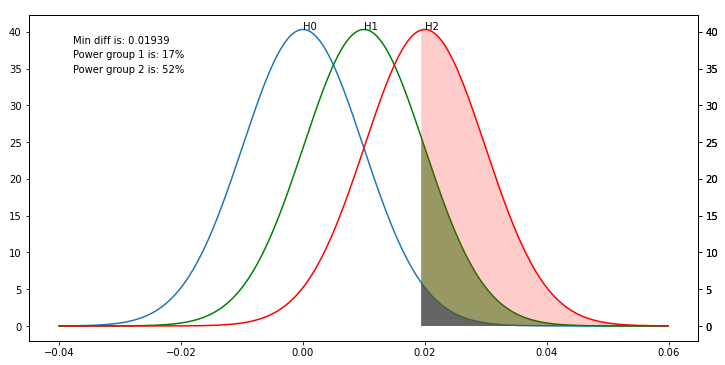

In [12]:
# Since we draw the graph for 3, let's just assume pooled SE is calculated with bcr=0.1 and lift=0.02
SE_0 = calculate_SE(0.1, 0.12, 2000, 2000)
SE_1 = calculate_SE(0.1, 0.12, 2000, 2000)
SE_2 = calculate_SE(0.1, 0.12, 2000, 2000)
plot_multiple_alt(0, 0.01, 0.02, SE_0, SE_1, SE_2)

/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nam/opt/anaconda3/envs/essential/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

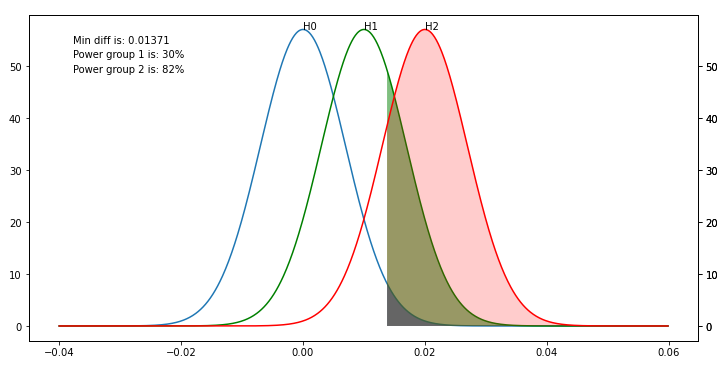

In [13]:
SE_0 = calculate_SE(0.1, 0.12, 4000, 4000)
SE_1 = calculate_SE(0.1, 0.12, 4000, 4000)
SE_2 = calculate_SE(0.1, 0.12, 4000, 4000)
plot_multiple_alt(0, 0.01, 0.02, SE_0, SE_1, SE_2)

### Sample size calculator

#### Evan Miller formula

*Formula to calculate number of sample is:* <br/>
$$n = \frac{(z_{\alpha/2} * \sqrt{2*\sigma^2_{control})} + z_\beta * \sqrt{\sigma^2_{control} + \sigma^2_{experiment}})^2}{\delta^2}$$<br/>
where, <br/>
$$\sigma^2 = p(1-p)$$<br/>
with, <br/>
**n**: number of sample needed in each group<br/>
**$\alpha$**: desired statistical significance level<br/>
**$\beta$**: 1 - power<br/>
**$\delta$**: absolute practical significance<br/>

#### Pooled SE Stanford formula

*Formula to calculate number of sample is:* <br/>
$$n = \frac{2\sigma^2(Z_\beta + Z_{\alpha/2})^2}{\delta^2}$$<br/>
where, <br/>
$$\sigma^2 = p_{pool}(1-p_{pool})$$<br/>
with, <br/>
**n**: number of sample needed in each group<br/>
**$\alpha$**: desired statistical significance level<br/>
**$\beta$**: 1 - power<br/>
**Z_i**: respective z-score under the standard normal distribution (0.84 for 80% power and 1.96 for 5% alpha) <br/>
**$\delta$**: absolute practical significance<br/>

In [14]:
calc_sample_size(alpha=0.05, beta=0.2, p=0.1, delta=0.02, method='pooled_se')

3842.026629963879

In [15]:
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [21]:
im = interact(explore_ab, bcr=(0.01, 0.2, 0.01), lift=(0.01, 0.05, 0.01), size=(2000, 10000, 100), split=fixed(0.5))

interactive(children=(FloatSlider(value=0.09999999999999999, description='bcr', max=0.2, min=0.01, step=0.01),…